# Study usage of suspect hashtag

## Import

In [1]:
import pandas as pd
import json
import numpy as np
import re
from itertools import repeat

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

from concurrent.futures import wait as futures_wait
from concurrent.futures.process import ProcessPoolExecutor

import importlib
import hashtag_util as ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['hashtags','user_screen_name','created_at','user_created_at','user_code_error'])

df

,created_at,user_screen_name,user_created_at,hashtags,user_code_error
0,Thu Oct 01 23:05:18 +0000 2020,alessia_smile6,Sat Sep 01 18:36:08 +0000 2018,[],NaN
1,Thu Oct 01 23:42:33 +0000 2020,GiornaledPuglia,Fri Feb 12 09:11:24 +0000 2010,[],NaN
2,Thu Oct 01 23:10:10 +0000 2020,TestPerTutti,Sun Jul 05 09:37:48 +0000 2020,[],NaN
3,Thu Oct 01 22:42:17 +0000 2020,CapitanHarlok6,Fri Jan 10 23:37:56 +0000 2020,[],NaN
4,Thu Oct 01 23:15:04 +0000 2020,soteros1,Tue Jul 01 17:29:02 +0000 2014,[],NaN
...,...,...,...,...,...
4053196,Tue May 18 11:05:08 +0000 2021,CiaoGrosso,Sun Jan 15 17:25:21 +0000 2012,[],NaN
4053197,Tue May 18 11:05:13 +0000 2021,Rosskitty77,Sun Feb 19 18:26:36 +0000 2012,[],NaN
4053198,Tue May 18 11:04:42 +0000 2021,GuidoIafrate,Mon Jan 22 22:43:30 +0000 2018,[],NaN
4053199,Tue May 18 11:04:45 +0000 2021,lucabattanta,Thu Jul 16 15:14:03 +0000 2009,"[{'text': 'lariachetira', 'indices': [14, 27]}]",NaN


In [3]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

In [4]:
listHashtagsStudy = ['5g','billgates','dittatura*.','.*disobbedisco','nessunacorrelazione','byoblu*.']

In [5]:
dfUse = ut.process_df_uses_hashtags(df,listHashtagsStudy)
dfUse

,user,5g,billgates,dittatura*.,.*disobbedisco,nessunacorrelazione,byoblu*.
0,daniele19921,False,False,False,False,False,False
1,daniele19921,False,False,False,False,False,False
2,RossellaPierac3,False,False,False,False,False,False
3,RossellaPierac3,False,False,False,False,False,False
4,ZombieBuster5,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2172628,ELENAGORINI2,False,False,False,False,False,False
2172629,Katia48386800,False,False,False,False,False,False
2172630,PredragLecic,False,False,False,False,False,False
2172631,PredragLecic,False,False,False,False,False,False


In [6]:
dfUseHashtag = dfUse.groupby('user').any()
dfUseHashtag['user_created_at'] = pd.to_datetime(df.groupby('user_screen_name').first()['user_created_at'],
                                                 format="%a %b %d %X %z %Y")
dfUseHashtag['user_error'] = df.groupby('user_screen_name').first()['user_code_error']

In [7]:
dfUseHashtag = ut.hashtagAND(listHashtagsStudy,dfUseHashtag)
for i in range(1,len(listHashtagsStudy)):
    dfUseHashtag = ut.hashtagOR(listHashtagsStudy,dfUseHashtag,'OR'+str(i),i)

In [8]:
dfUseHashtag

,5g,billgates,dittatura*.,.*disobbedisco,nessunacorrelazione,byoblu*.,user_created_at,user_error,AND,OR1,OR2,OR3,OR4,OR5
user,,,,,,,,,,,,,,
00000o0OOOO00,False,False,False,False,False,False,2014-07-27 22:45:37+00:00,NaN,False,False,False,False,False,False
000Rizzo,False,False,False,False,False,False,2014-05-15 20:04:39+00:00,NaN,False,False,False,False,False,False
000oro000,False,False,False,False,False,False,2019-06-28 15:46:03+00:00,NaN,False,False,False,False,False,False
000qwerty777,False,False,False,False,False,False,2013-06-13 21:50:48+00:00,NaN,False,False,False,False,False,False
00222317L,False,False,False,False,False,False,2015-02-12 17:18:38+00:00,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zziocane66,True,True,False,False,True,False,2020-01-01 01:54:01+00:00,NaN,False,True,True,True,False,False
zzolgima_imma,False,False,False,False,False,False,2011-12-12 11:14:43+00:00,NaN,False,False,False,False,False,False
zzostru,False,False,False,False,False,False,2018-07-21 11:59:53+00:00,NaN,False,False,False,False,False,False


## General study of the hashtags

In [9]:
for i in range(1,len(listHashtagsStudy)):
    print("User that have used at least %d hashtags (%i)"%(i,sum(dfUseHashtag['OR'+str(i)])))
    for u in dfUseHashtag.index:
        if dfUseHashtag['OR'+str(i)][u]:
            print("\t%s"%u)


User that have used at least 1 hashtags (6811)
	00_h16
	00ann000
	05Varf
	0Cicerone
	101AnagrammiZen
	10clarenc3
	11secon
	12qbert
	13mari81
	14_88_666
	15Nevermind
	16q___
	17Enomis
	17_vin
	18_agosto
	1950_anna
	1956lia
	1971itimpa
	1973Dario09
	19TIZIANO72
	19marino74
	1AsinoKeVola
	1Clochard
	1GROSSI
	1Marzia2
	1Swedemborg
	1UnPassante
	1guadagn
	1marcoo
	1nove71
	1tal1al1b3ra
	2000fallito
	2002MMAD0691
	2009Daria
	2014Monaco
	2016shift
	21lettere
	2312_leonardo
	23neroecamilla
	25O319
	25gennaio1
	2631925
	270349
	27crazyfrog
	27ottobre2020
	280juliet
	2849Dama
	2Biagetti
	2Foye
	2Qrocky
	2_crim
	2_italie
	2b341b94244240a
	2essera
	2minutesweb1
	2piedi
	300Italia
	30mirella51
	361_magazine
	366daniele
	3Cardi
	470simone
	4T_Mexico_
	4everAnnina
	4maipiu4
	501_tot
	59Dipendente
	5Selector
	5dancingis
	60_cla
	6166467278004cc
	64Almo
	65_virna
	666Burzum777
	69Brancato
	69Nique
	6harvest_ny
	73Orlando73
	73rv
	74Sticca
	74_cappe
	75Ginny
	77mikemason
	7August17
	7___________o_O
	7m7

	Daria_Ginevra
	DaridaGabriele
	DarioCapellero
	DarioPagella08
	DarioPanzac89
	DarioSG77
	Dario_Giuffrida
	DartNose
	DarthWario
	DatabaseItalia
	DaustoC
	DavPoggi
	DavePollak4
	DavelloStefano
	David7883671141
	DavidDiogenes5
	DavidG__
	Davide00969726
	Davide27862
	DavideCh61
	DavideCianchino
	DavideCrusader
	DavideGiac
	DavideOberta
	DavideTheGr8
	Davjd_S
	DavveroTv
	DaxGregory
	Dayne999
	Dbaggiani1
	De51Fra
	Deangaia1
	DeathOfaSalesma
	Debora98398253
	DecimoGianni
	DeerEwan
	DefectorOf
	DeficitMiManchi
	DeganisFabrizio
	DelgadoSveva
	DelleChiaiePia
	Delorenzoanna1
	DemianReal
	DenLombardo
	DennisAngemi
	DenteEleonora
	DesDemona2004
	Descent21011183
	Destradipopolo
	DevaMati
	Devizzz_
	Devosceglierlo
	DiImmobiliare
	DiPint3
	DiReddito
	Diabolikart
	DiacronicoMurra
	DiamanteGiallo
	DianaLanciotti
	DianaNapolitan4
	Diddi61075948
	Diego90190488
	Diego94601132
	DiegoA20_17_38
	DiegoCa_73
	DiegoFracasso1
	DiegoPetracca27
	Diego_Bruno80
	DigitalMatt3
	DimKomesarios
	Dinbsky
	Diogene55
	Dioge

	HelperStream
	Hendriqo
	Henry0762
	HenryDa77267516
	Hepicuro
	Hibbing59
	Homers_howl
	HonestLuke66
	HoneyBeMe2
	Hopethefirst1
	HornbeamJoe
	Houellebecqien
	Hu2Dio
	HubertBrowns
	Hygbor
	IAlianna_
	IBezdomnyj
	IComunale
	IGalattico
	IGarini
	IJIT_jfl
	IKIGAI_AISURU
	ILOVEPACALCIO
	IL_PATRIOTA1
	IM_Dany_83
	IMassardo
	IMessapico
	IMoresi
	INFORMALTV1
	INUZA_VINZ
	IRisveglio
	ISHINE22
	ITALEXIT6
	ITardivo
	ITdominusIT
	I_am_Scozzi
	IacoTullio
	IacobellisT
	IaconiBiagio
	IamLiuk
	IanoS59
	Icompetenti
	IeeeMatteo
	IfIreallyknewme
	IginoDeRossi
	Igorg68894575
	Iknowitsover70
	IlBeneVincera
	IlCastiga
	IlConteIT
	IlCorsaroRosso1
	IlGiovani
	IlInformato
	IlMarcheseDelG4
	IlMattonista
	IlNasara
	IlParadiso0
	IlReverendo71
	Il_Littore
	Il_Negro_
	Il_Notturno
	Il_Populista_
	Il_Professore__
	Il_Quercus
	Il_Sovrano
	Ila285
	Ilaria09063212
	Ilaria19425156
	IlariaDelle
	Ilconservator
	IleniaC80
	Ilmomo4
	Ilmoralizzator9
	IlnuovoPreside1
	Ilpicanese2
	Ilsognatore13
	Im_Mtt
	Imbuzz59
	ImhoSpace
	Imma

	MillaGentile
	Milla_58
	Milly__24__
	Mimmi13742863
	Mimmino62
	MimmoMizzi
	MimmoMoramarco
	MinaCapobianco
	MindfulnessZen2
	Mine_1509
	MinervaMcGrani1
	Minimo_giugli
	MinutePietro
	MinutemanItaly
	MiraKiks
	MircoSimeoni
	Mirino73
	MirizziP
	Mirko92982183
	MirkoBullegas
	MirkoZapparoli
	Mirkoeby86
	Mirkosway74
	Mirto11GC
	MissDafy
	MissDreamer88
	MistriOscar
	Misurelli77
	MitiGinilein
	Miti_Vigliero
	MiyakeEau
	Mizuashi_
	MjKipgen
	MoaiUnicorn
	MoeLuz
	MohamedZaraa
	Mohamed__Saady
	Mollanews
	MollePaolo
	Momo40727697
	MonEleonora
	MondoDiConfine
	MondoDigitaleVV
	Moneymaker98000
	Monfortino1
	MoniaProvvedi
	Monica24675734
	Monica2738
	Monica76699822
	MonicaGipsy
	Monicanpl
	MontanariPier
	MonterisiVito
	MonycaMarini
	Moon13_me
	MoonLuchy
	Moonlightshad1
	MoranShasa
	MorettiFabio3
	MorpheusFabio
	MorriSabrina
	MovPopulistaIta
	MrAndrewQ
	MrJesterK
	MrPigna91
	MrSpazzaneve
	MrWeedz1
	Mr_Fricci
	Mr_Mrk1
	Mr_Ozymandias
	Mr_nonloso
	MsFly78
	Mukenin
	MuredduGiovanni
	MurielMuriella
	MurphyC

	RoxLory
	Roxennes_
	Roxy19794
	Royest_
	Rpap959
	RubinoMauro
	RubiuAntonello1
	Rubrick90
	Ruby_Mustang
	RuggeriLucio
	RuleSany
	Run_Man_
	Rundagio
	RussianMike31
	Russo5111
	RussoTosca
	Ryu2176798434
	S08789839
	S20WON
	SCEMENZA
	SCaronti
	SCinfocorretta
	SETTECANALI
	SErrico77
	SF67803545
	SF_RL_Featuring
	SFormichini
	SGiarrizzo
	SILVIALUCISANO
	SILVIOVEO
	SPHONSOHR
	SPiras5
	SRovesciato
	SSLAZIO1900SS
	SSaponelli
	SSkeno20371
	SStef_III
	STFU_u2
	SUSANNA60128891
	SaMorandi79
	Sabina1956
	SabriBenetazzo
	Sabry09439578
	Sabylz
	Saelvig
	SaettaMcQueen36
	Saetta_McQueen
	SaffronHorizon
	SafinumNerf
	SaggioYogurt
	Sagitta11232071
	Sakina268
	Sakurauchi_Hime
	Sal_Caccavale
	SaliSimone
	Salinge06174892
	SalutamaS
	SaluteLab
	Salvati_Emilio
	Salvato68284801
	Salvato75735378
	SalvatoreBelliz
	SalvatoreTrim13
	Salvio9780
	Salvo1296_
	Salvo15961826
	SalvoContino11
	Salvo_delu
	SamGibili1
	Sam_12345_
	Samira1577
	Sampetria
	SampieriValdis
	SamueleCosta14
	SamueleVisc
	San74208921
	SandraE82526

	andreatoma_13
	andrefrassi_
	andreinazaccar1
	andrelettrico
	andressimball
	andrewsword2
	andy43805264
	anfo13
	angel_other
	angela66762414
	angeleri_mauro
	angelica_emme
	angelicabaires
	angelicovito
	angelisogna
	angelo25771504
	angelo38305960
	angelo7milano
	angelo_arcadu
	angelo_ra_
	angeloselvini
	angie_flame
	angiuoniluigi
	angolivio
	angolotre
	angy_angy67
	angy_cocco
	ani47638789
	anitaelaura
	anna30048679
	anna_verzi
	annaart89
	annabellarigi
	annac82
	annacostabilef1
	annaerre49
	annagraziaq4
	annalaurabar
	annalisa2913
	annamariacec
	annamariamarco
	annamariasummon
	annangelo97
	annarigel
	annatamburini
	annawcz2
	anovtherlove
	ansol75
	ansyastark
	antbar12
	antcampan
	anthos555
	anticofuturo
	anticorrotti
	antieuropeistaa
	antipapisti
	antlucig
	antman_i
	anto38993696
	anto_a_a
	anto_e_basta
	anto_galli4
	antokindness
	antolor15
	antomel22
	antondepierro
	antonellacirce1
	antonellazacca4
	antonia_sinisi
	antoniacri
	antoniettamia
	antoninobill
	antonio32114296
	antonioXL68

	fabryegio
	fabsat1
	facciamoride
	facio75
	factchecking18
	fairyfederica
	fairysea86
	falanga_na
	falcao_fo
	falchetto581
	faquirite
	farbonobo
	farfarella76
	fattimiei9
	faustacu
	fausto_delfini
	faustomaroccia
	fdelbergiolo
	fdez_pedro
	fearnobody00
	fed851
	fede_idox
	fedemarletta
	federica_moccia
	federico_blue
	federico_d86
	federicolore96
	federiconosekai
	federicotubaro
	federlor111
	fefebaraonda
	felicedalcol
	felix3alice
	fenicelettrice
	ferillo2
	ferma58
	feros681
	ferrandoluigi
	ferrari94464115
	ferroice40
	ferruccio_zara
	ferrucciocor
	ff0rt
	fforzano
	fgiandi82
	fgr62
	fgraniglia
	ficio84
	figliolaraf67
	fil_autoctono
	fildifranco
	filipailand
	filippo95239679
	filippo_procino
	filippocecchin2
	filippopuccioo
	filo_78
	findyourdata
	fiorel70
	fish_75
	fjadanza
	flauraUSPP
	flayawa
	florabazza74
	flordasaguas5
	flowersiall
	flucekk
	fm347153
	fmastrovito
	fmonaldi65
	fnpCislIS
	fnpabruzzomolis
	foAldo
	fogliadortica
	folucar
	foraboscoelvis
	forestale82
	fracaruc
	fracchio

	marcombri
	marcomiccoli1
	marcomontys
	marconisida
	marcopalears
	marcoranieri72
	marcovegan70
	marcovesima
	marcuspascal1
	marcycefeide
	marczone1
	mareamistral
	maretegge
	marfeluca
	margheritavend2
	maria1_e_basta
	maria35008812
	maria_previtera
	mariacarla1963
	mariace48773268
	mariagraziapet6
	marialauraloi
	marialetiziama9
	mariamarilucen
	mariamasi14
	mariamworldart
	mariana80024548
	mariangelalo33
	marianomores61
	mariavichetoria
	maric106
	marielSiviglia
	marielladidi
	marieta03159369
	marijoa64
	marika_kwater
	marilenagasbar1
	marilenamafe
	marin_cdm
	marino29b
	marinodestena
	mariodauria
	mariodelrio99
	mariolinocalcin
	mariorossinet
	marisavillani
	markbezdicek
	markred17
	marp8591
	marrone_tommaso
	mars_elee
	marsigatto
	marteblog
	marteeares
	marterover2
	martinamilani74
	martinoloiacono
	martinss_b
	martisshe
	maryannicca
	maryfagi
	marymonella1
	marzia26282324
	marzia38580873
	marziaminozzi
	masfulv
	massi1966
	massimo991
	massimo_avv
	massimo_san
	massimosab
	mastandu

	stechieri
	steel__flower
	stefaniabenemio
	stefaniacampani
	stefano_novelli
	stefano_romani
	stefano_sir
	stefanobini
	stefatien
	stefycascu
	stella6615
	stellatizias
	stelle_lune
	stemhh
	stenric56
	stesimo1263
	stewin86
	stikystikazz
	stilgar_it
	stleale
	stocazzzzzo
	storer_f
	storm19737
	stravin81_ssl
	studiolauranola
	successiEuropei
	succodilimone1
	sue_sue212
	sunflowerj95
	sunsetodown
	sunshinebalbo
	sunwave9_
	supermandrake2
	superprincipe83
	sursumcorda29
	susananderton5
	susannadavinci
	susarda
	suxzap
	svaroschidiego
	sverginami
	swan92678832
	swasye1
	syltrue
	szibris
	taberlet
	taila44991038
	taj_zkt
	taketakechan
	takoda86
	talismanogiada
	taluladoeshulah
	tamangha
	tangio_spo
	tano2763
	tarcisioluciani
	targsuitsme
	tartaruga20201
	tea7117
	temehisalie
	temporero1988
	tempoweb
	teoago72
	teobaratto90
	teodamia
	teoultimo
	teoxandra
	terrier1968bull
	terryk953
	tg2000it
	thanafey
	thatsalyson
	theDomeOfLord
	theStendall
	the_bargain
	the_bud_ita
	the_bullet_xxx
	the_inm

	Ulisse58969084
	Ultron65
	UmbertoNew
	Umby_1982
	V3lv3tBlu
	VCountry3
	V_Mannello
	Vafankulu_Euru
	Val1Rosa
	Valerio50810961
	ValerioMinnella
	Valerio_Brinato
	Valter41271244
	Vanhacker
	VedeleAngela
	Venere781
	Veraelena5
	Verdoux11
	VerniereDi
	Vince80564611
	VinceFerretti
	VincenzoTr75
	VinnieVegaPF
	Viola_mg
	Virginius17
	Vitellozzo
	VotersItalia
	VoxClamantis5
	Vulcanelios
	WCostituzione
	Weefu4
	WomanInBlack24
	Xueza_00
	Yi_Benevolence
	Z3r0Rules
	ZaffutoCarmelo
	Zaira_Bartucca
	Zeta_user
	ZiO_Iv0
	ZiaCandida
	ZioKlint
	ZombieBuster5
	Zzzz88A
	_A_mors
	_MoonDreams
	_Velies_
	__WolfHeart__
	___John_Smith__
	_alxbw_
	_fiorucci
	_propriobbene
	aAnnanka
	a_meluzzi
	aa_emme
	aanddrreaa
	abraseve
	absolutelyblank
	acamilli
	acocukora
	actarus1070
	adaalighi
	adolar41744618
	adrianobusolin
	adrineri7
	aelyana
	afnio72
	alabardante
	aladinae12
	alarico999
	albealias
	albertocaldana
	albertocarvani
	albiuno
	alborama
	aldo_rovi
	aldozana1769
	alejandrocc67
	alexbardi22
	alita31580584
	al

	BSanturbano
	BarPutin
	BarbaraRaval
	BdeligioBruno
	Beppe1158
	Bettabetta59
	Bobbio65M
	Brownfox_51
	Carla78501510
	Carlo_A_Macc
	Carlomrtz
	CarpaneseSilva1
	CastigamattU
	CatSun61
	Cesare_Baronio
	ChiaraCh
	ChiaraVe
	CinziaFufy74
	Cirenderaliberi
	ClaudiaMeloni7
	CuccioloHD
	DSant65
	Dakini02478820
	Daniela192601
	DavPoggi
	Davjd_S
	DevaMati
	DianaLanciotti
	Diego90190488
	DoctorWho744
	EURybor
	EdiMommi
	EffeF61
	Elisa72Parma
	Elisabe94838092
	ElizabethRavag1
	ElvioDeidda
	EmilianoSilv74
	EmyRoyaleagle
	Enki2270
	EricrapErikrap
	EtienneLorenza
	Etruria72
	EureosCriss
	Eveleenrey
	FPennabianca
	Fabio_DeBunker
	FabyCony3
	Faniuzza1
	Fedoraquattroc2
	Filomen30847137
	FmMosca
	Fra__j
	GAngrilli
	GRETA1SGARBO
	G_Chinellato
	GabrieleFigini
	GandolfoDomini1
	GastoneSabba
	Giandom84354994
	Giangi_ilBoomer
	Gianluc68325330
	Gianlustella
	Gianmar26145917
	GioChirilly
	GiorgioCarbon12
	Giorgio_SSL
	Giovanni7769
	Giulia08390249
	Giulio29375125
	GiuseppeDiMare
	GramsciAG
	Grandetornado2
	Graziel

	IvoAyrton
	JPCK72
	MaMaurizi9
	MariMario1
	MarySpes
	Mikepub1
	NonVaccinato
	PaoloBMb70
	QAin51404808
	RenatoCuttitta
	Rosskitty77
	SorryNs
	StarlightRevo
	Tribonacci1
	Viola_mg
	WCostituzione
	Weefu4
	andmar76
	arquer12
	bellogatto1
	caterinacorda1
	cdaria1
	d_essere
	marchesaangeli
	piersar62
	vendutoschifoso
	vsyelania41
	xenonian1


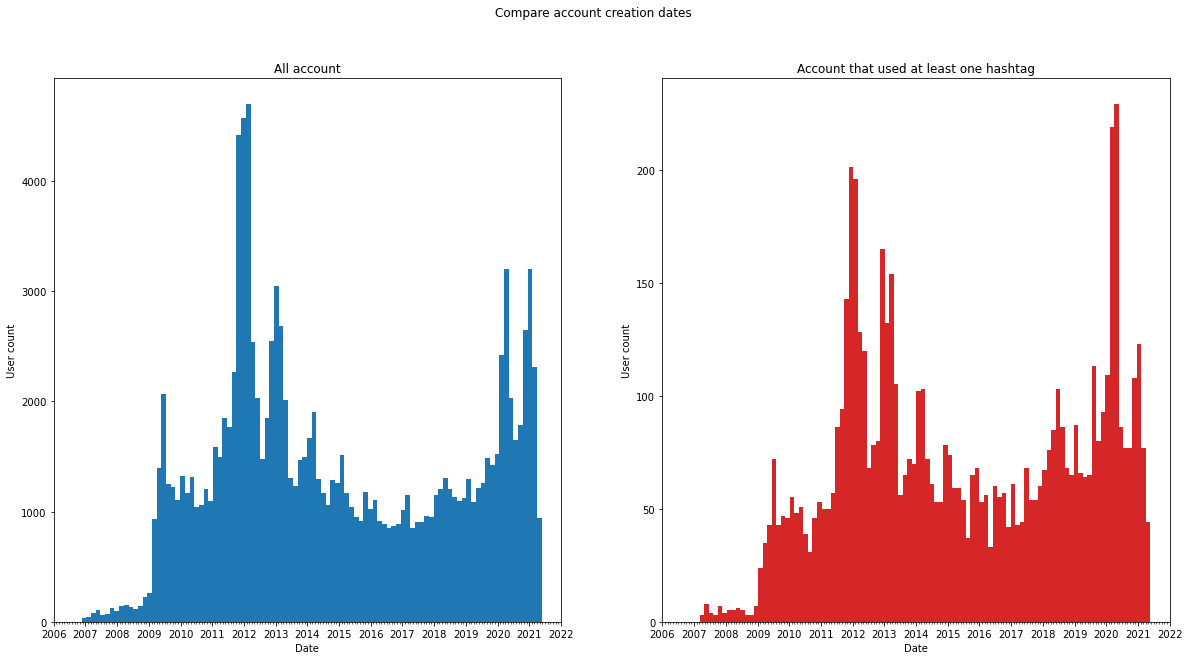

In [10]:
#Plot preparation
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
fig.suptitle('Compare account creation dates')

#Plot with all the accounts
ax1.hist(dfUseHashtag["user_created_at"],bins=100)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(months)
datemin = datetime.date(dfUseHashtag["user_created_at"].sort_values()[0].year, 1, 1)
datemax = datetime.date(dfUseHashtag["user_created_at"].sort_values()[-1].year + 1, 1, 1)
ax1.set_xlim(datemin, datemax)

ax1.set_title("All account")
ax1.set_xlabel('Date')
ax1.set_ylabel('User count')


#Plot with the accounts that have used at leat one suspicious hastag
ax2.hist(dfUseHashtag.loc[dfUseHashtag['OR1'],'user_created_at'],bins=100,color='tab:red')

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.xaxis.set_minor_locator(months)
datemin = datetime.date(dfUseHashtag["user_created_at"].sort_values()[0].year, 1, 1)
datemax = datetime.date(dfUseHashtag["user_created_at"].sort_values()[-1].year + 1, 1, 1)
ax2.set_xlim(datemin, datemax)

ax2.set_title("Account that used at least one hashtag")
ax2.set_xlabel('Date')
ax2.set_ylabel('User count')


plt.show()

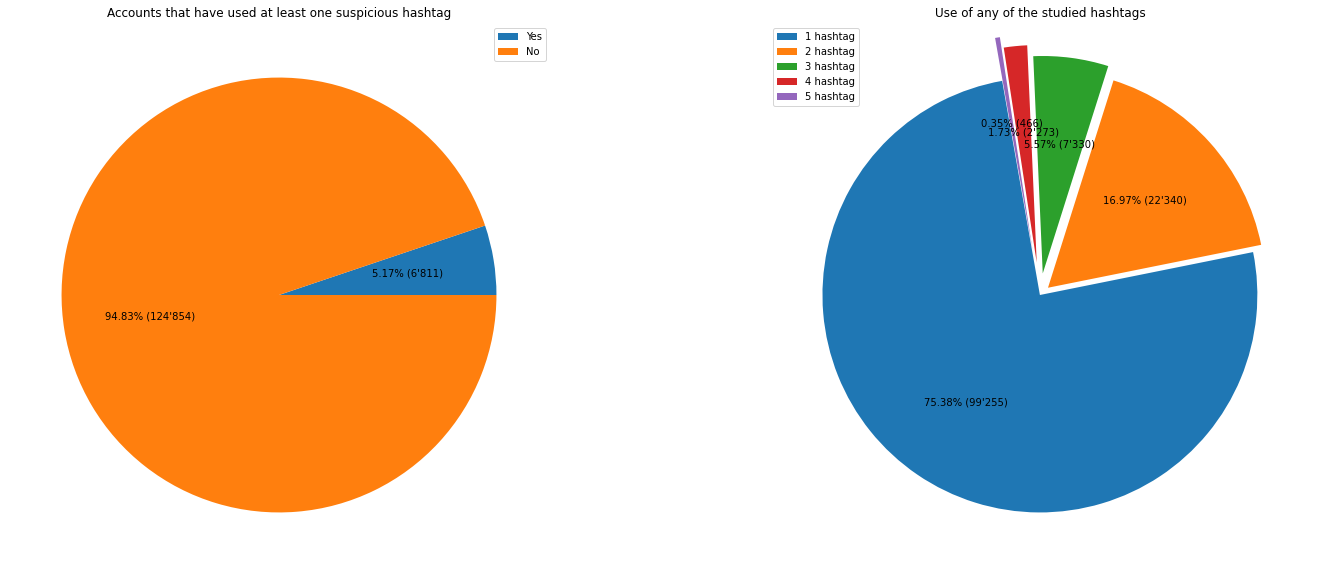

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,10),gridspec_kw={'width_ratios': [1, 1]})

#Accounts that have used at least one suspicious hashtag
values = [sum(dfUseHashtag['OR1']), len(dfUseHashtag) - sum(dfUseHashtag['OR1'])]
names = ['Yes', 'No']
ax1.pie(values,autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''))
ax1.set_title('Accounts that have used at least one suspicious hashtag')
ax1.legend(labels=names)

#Use of any of the studied hashtags
df1 = pd.DataFrame()
for i in range(1,len(listHashtagsStudy)):
    df1.loc[i,'name'] = str(i)+' hashtag'
    df1.loc[i,'numHashtags'] = sum(dfUseHashtag['OR'+str(i)])

ax2.pie(df1.numHashtags,startangle = 100, explode = [0.0,0.05,0.1,0.15,0.20],
        autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''))
ax2.legend(labels=df1.name)
ax2.set_title('Use of any of the studied hashtags')

plt.show()

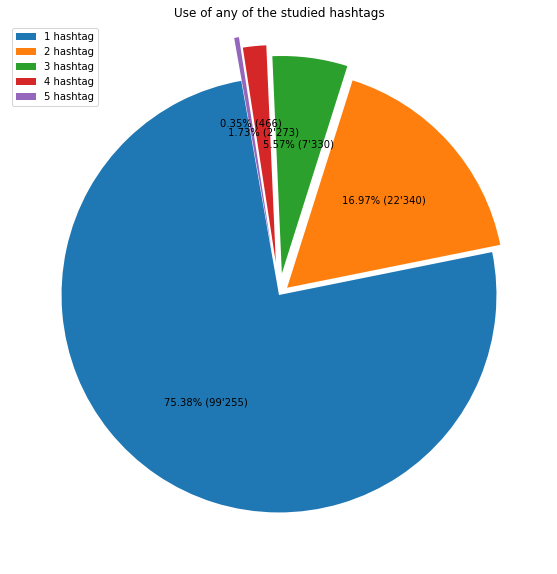

In [12]:
df1 = pd.DataFrame()
for i in range(1,len(listHashtagsStudy)):
    df1.loc[i,'name'] = str(i)+' hashtag'
    df1.loc[i,'numHashtags'] = sum(dfUseHashtag['OR'+str(i)])

plt.figure(figsize=(10, 10))
plt.pie(df1.numHashtags,startangle = 100, explode = [0.0,0.05,0.1,0.15,0.20],
        autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''))
plt.legend(labels=df1.name)
plt.title('Use of any of the studied hashtags')
plt.show()

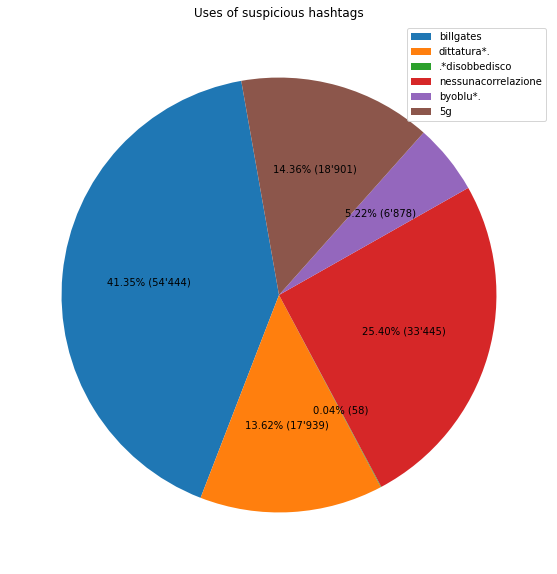

In [13]:
for i,h in enumerate(listHashtagsStudy):
    df1.loc[i,'name'] = h
    df1.loc[i,'numHashtags'] = sum(dfUseHashtag[h])
    
plt.figure(figsize=(10, 10))
plt.pie(df1.numHashtags,startangle = 100, autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''))
plt.legend(labels=df1.name)
plt.title('Uses of suspicious hashtags')
plt.show()

In [14]:
#Error code of user that uses this hashtag
print ("%d users have used a suspicious hashtag and have been suspended"
       %len(dfUseHashtag.loc[(dfUseHashtag['user_error']==63) & (dfUseHashtag['OR1']==True)]))
dfUseHashtag.loc[(dfUseHashtag['user_error']==63) & (dfUseHashtag['OR1']==True)]

39 users have used a suspicious hashtag and have been suspended


,5g,billgates,dittatura*.,.*disobbedisco,nessunacorrelazione,byoblu*.,user_created_at,user_error,AND,OR1,OR2,OR3,OR4,OR5
user,,,,,,,,,,,,,,
Absolut32791095,False,False,True,False,False,False,2021-02-24 06:13:41+00:00,63.0,False,True,False,False,False,False
AlainMazzuno,False,False,False,False,True,False,2012-02-27 14:53:59+00:00,63.0,False,True,False,False,False,False
AlexTheMod,False,True,False,False,False,True,2009-06-02 17:21:55+00:00,63.0,False,True,True,False,False,False
Chuto_o_balde,False,False,True,False,False,False,2014-08-08 16:07:36+00:00,63.0,False,True,False,False,False,False
Epalermo2020,False,False,False,False,True,False,2020-09-14 23:36:05+00:00,63.0,False,True,False,False,False,False
FaggianoLepre,False,False,False,False,True,False,2020-12-31 14:34:50+00:00,63.0,False,True,False,False,False,False
GiovannaSandr16,False,False,False,False,True,True,2021-04-05 13:41:27+00:00,63.0,False,True,True,False,False,False
JonhDenv,False,False,False,False,True,False,2021-04-14 18:15:16+00:00,63.0,False,True,False,False,False,False
KentAllard23,False,True,False,False,False,False,2012-02-02 20:12:48+00:00,63.0,False,True,False,False,False,False


## Comparison with noVax users

In [15]:
dfNovax = pd.read_csv('../tweets_novax.csv',low_memory=False, usecols=['user_screen_name'])
user_novax = list(dfNovax.groupby('user_screen_name').first().index)

In [16]:
print('Users classified as no vax who use at least a certain number of "suspicious" hastags')
for i in range (1,6):
    or_i = "OR%d"%i
    df1 = dfUseHashtag[dfUseHashtag[or_i]]
    dfUseHashtagNovax = df1[df1.index.isin(user_novax)]
    print("\ti =",i,":\t",(len(dfUseHashtagNovax) / len(df1))*100,"%")

Users classified as no vax who use at least a certain number of "suspicious" hastags
	i = 1 :	 49.258552341800026 %
	i = 2 :	 80.16960208741031 %
	i = 3 :	 92.6441351888668 %
	i = 4 :	 96.7948717948718 %
	i = 5 :	 96.875 %


In [17]:
dfUseByDate = ut.process_dfUse(df)
dfUseByDate

,Week/Year,hashtag,count
165526,2020-01-06,espertopoli,2
165467,2020-01-06,Taverna,1
165466,2020-01-06,TG24,1
165465,2020-01-06,TBC,1
165464,2020-01-06,StanleyPlotkin,5
...,...,...,...
25060,2021-05-17,fabriziopregliasco,1
25059,2021-05-17,fabriziocurcio,1
25058,2021-05-17,fabbriche,1
25056,2021-05-17,evidenzescientifiche,1


In [18]:
l = []
for h in dfUseByDate['hashtag'].unique():
    for r in listHashtagsStudy:
        if re.match(r,h):
            l.append(h)
l = list(set(l))

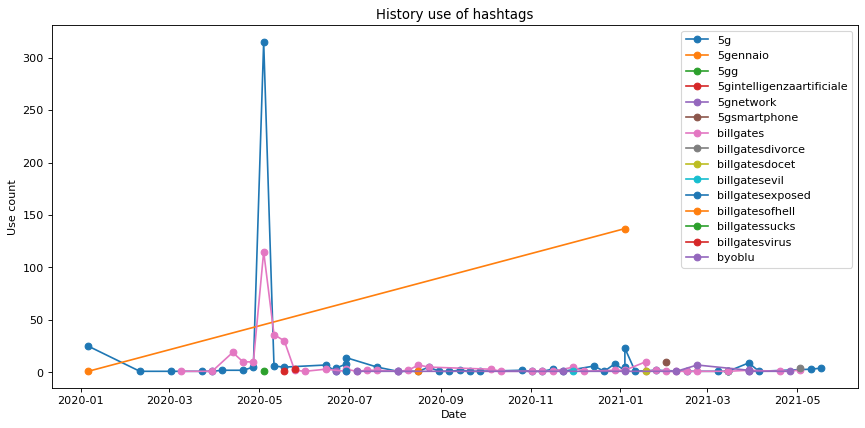

In [19]:
ut.visual_by_date_together(pd.DataFrame(l).groupby(0).count(),dfUseByDate,15)